# Klasteryzacja


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blobs = pd.read_csv('./blobs.txt', header=None)
circles =  pd.read_csv('./circles.txt', header=None)
ellipses = pd.read_csv('./ellipses.txt', header=None)
moons = pd.read_csv('./moons.txt', header=None)

print(blobs.head())
print(circles.head())
print(ellipses.head())
print(moons.head())

dataset = [blobs,circles,ellipses,moons]

          0         1  2
0  1.103182  4.705777  0
1 -1.932846  3.642251  2
2 -2.034422  1.866002  2
3  1.616402  2.686831  0
4 -0.960010  4.492566  0
          0         1  2
0 -0.667240  0.767885  0
1  0.400662  0.059620  1
2  0.363861  0.373178  1
3  0.078146 -0.486274  1
4  0.298390 -0.553928  1
          0         1  2
0  1.730207 -1.848657  2
1  0.359788 -0.337610  2
2 -2.981336  3.080587  1
3  2.386856 -2.842995  2
4 -3.315642  0.656019  0
          0         1  2
0  0.669694 -0.434326  1
1  1.407503 -0.464530  1
2  0.848534  0.416112  0
3  0.450751  0.802704  0
4  1.970001  0.167788  1


In [3]:
print(blobs[2].unique())
print(circles[2].unique())
print(ellipses[2].unique())
print(moons[2].unique())

[0 2 1]
[0 1]
[2 1 0]
[1 0]


In [17]:
def show(df,title=""):
    values = df[2].unique()
    colors = ['green', 'red', 'blue', 'orange' , 'brown', 'salmon', 'grey', 'yellow','pink','purple','olive','cyan']

    clr = 0
    for i in values:
      class0 = df[df[2]== i]
      if i < 0:
        plt.scatter(class0[0],class0[1],color='black',label = str(i))
      else:
        plt.scatter(class0[0],class0[1],color=colors[clr%len(colors)],label = str(i))
      clr += 1

    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

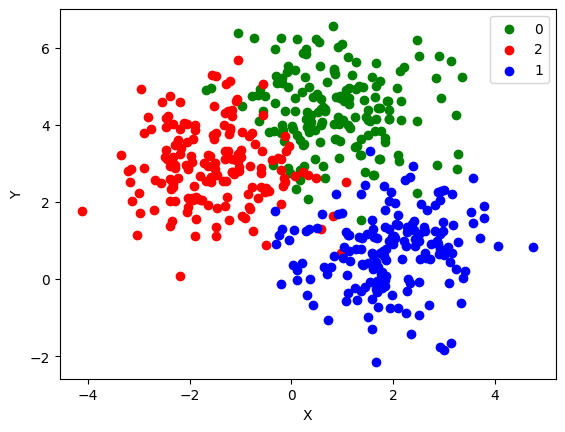

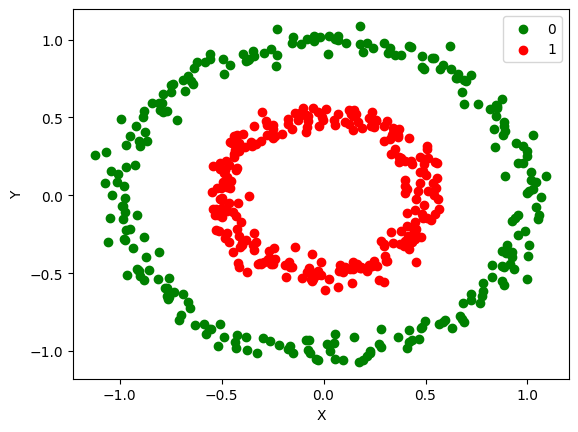

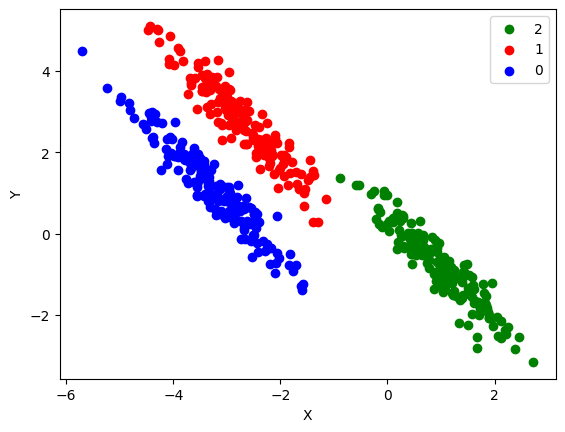

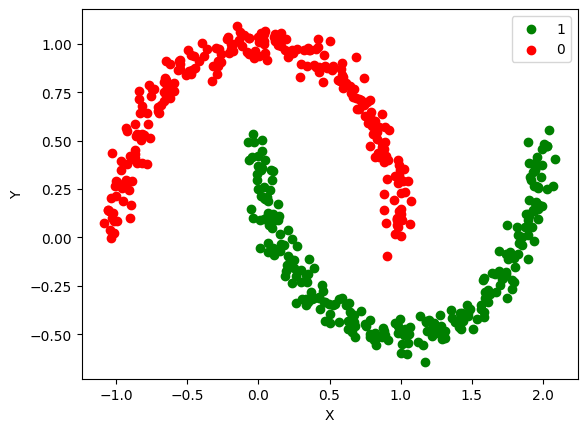

In [7]:
for data in dataset:
  show(data)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
def show_KMeans(df,n_clusters,title):
  df_y = df.pop(2)
  kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(df)
  df[2] = kmeans.labels_

  show(df,title)


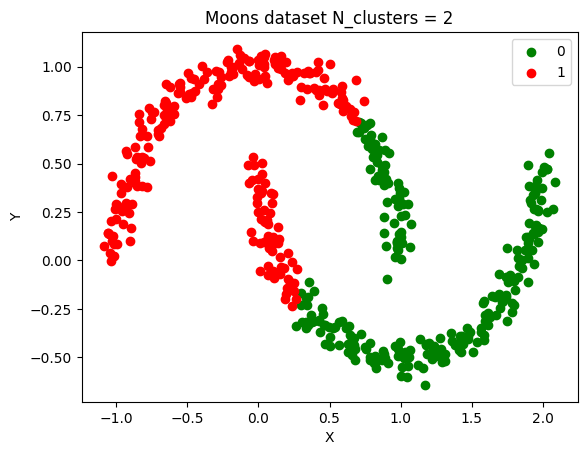

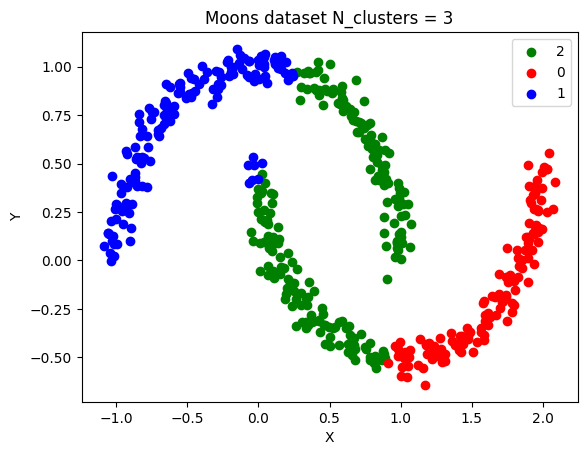

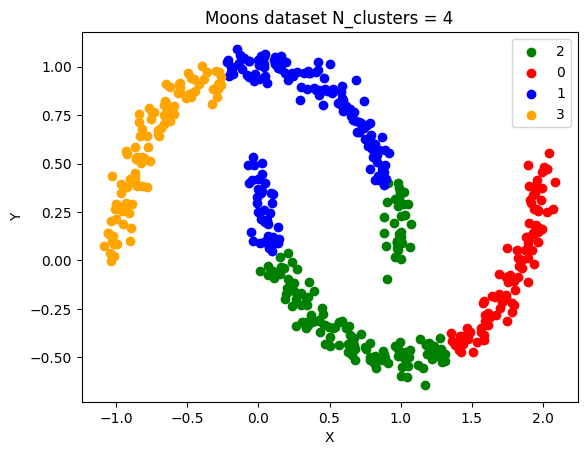

In [10]:
for i in range(2,5):
  show_KMeans(moons.copy(),i,f"Moons dataset N_clusters = {i}")


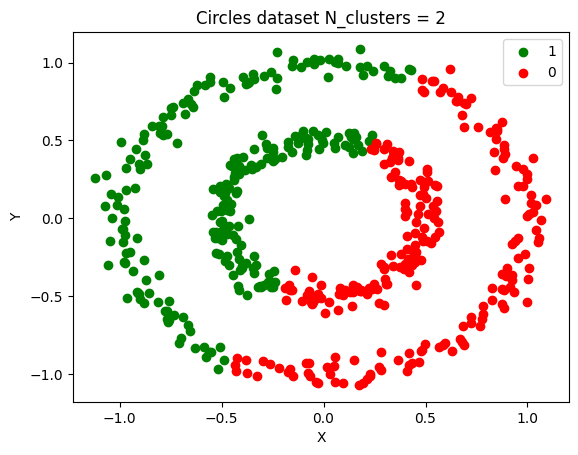

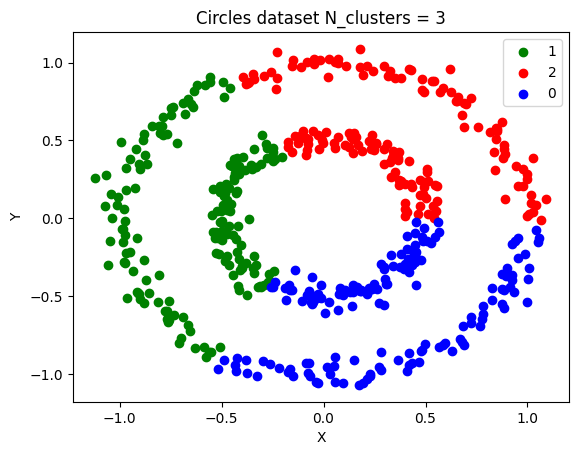

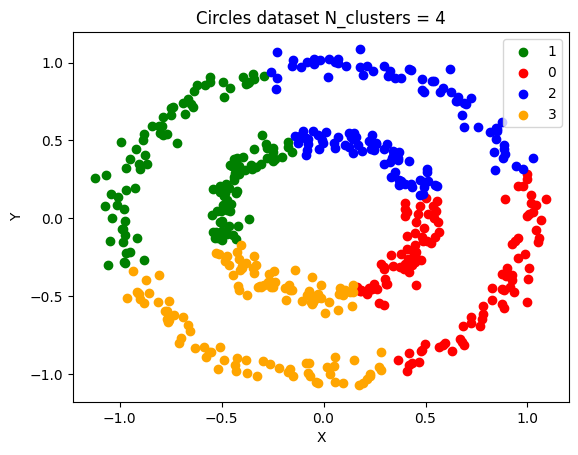

In [11]:
for i in range(2,5):
  show_KMeans(circles.copy(),i,f"Circles dataset N_clusters = {i}")

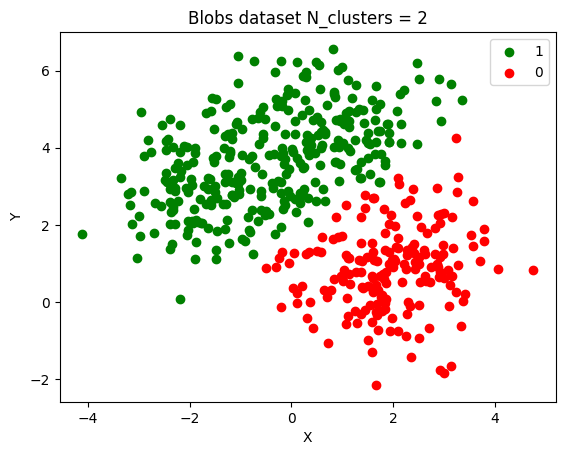

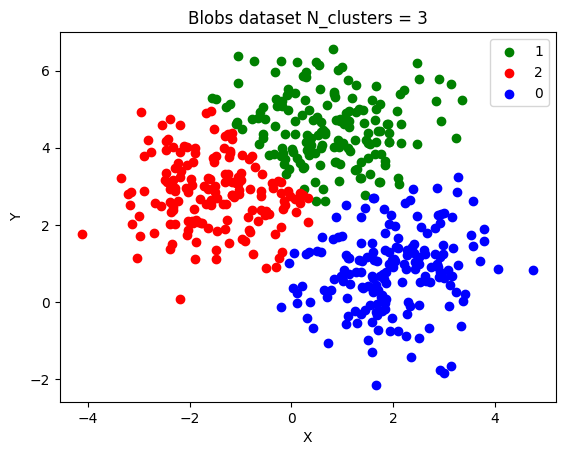

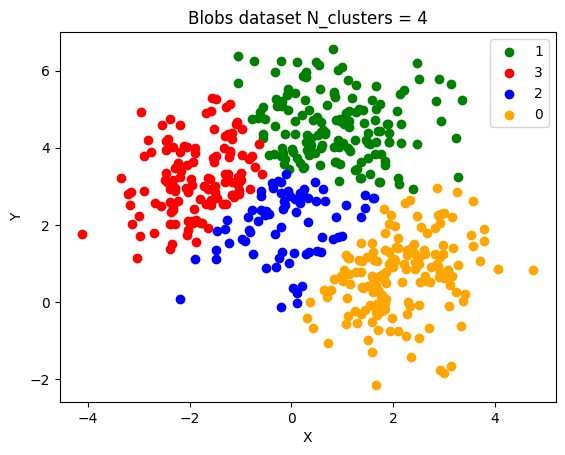

In [12]:
for i in range(2,5):
  show_KMeans(blobs.copy(),i,f"Blobs dataset N_clusters = {i}")

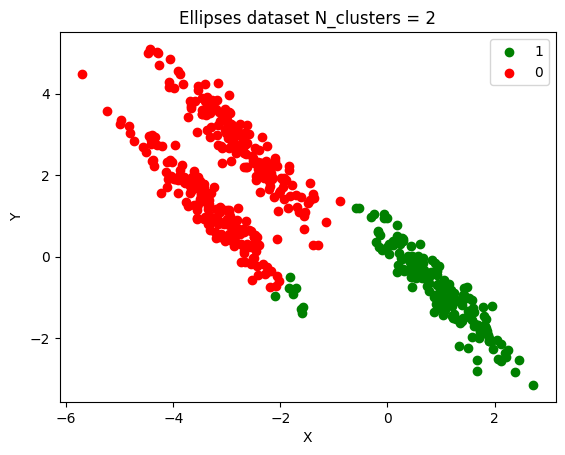

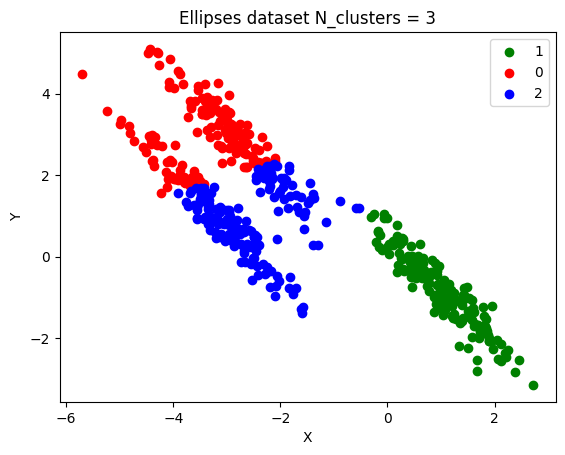

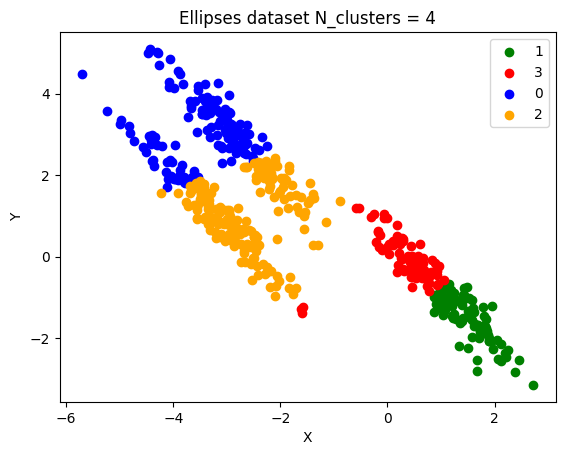

In [13]:
for i in range(2,5):
  show_KMeans(ellipses.copy(),i,f"Ellipses dataset N_clusters = {i}")

Obliczenie dokładności

In [14]:
from sklearn.metrics import accuracy_score
def accuracy_KMeans(df,n_clusters):
  df_y = df.pop(2)
  kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(df)
  return accuracy_score(df_y,kmeans.labels_)

print("Accuracy for KMeans:")
print("Circles")
for i in range(2,5):
  print("Clusters: ", i, "Accuracy: ",accuracy_KMeans(circles.copy(),i))
print("Moons")
for i in range(2,5):
  print("Clusters: ", i, "Accuracy: ",accuracy_KMeans(moons.copy(),i))
print("ellipses")
for i in range(2,5):
  print("Clusters: ", i, "Accuracy: ",accuracy_KMeans(ellipses.copy(),i))
print("blobs")
for i in range(2,5):
  print("Clusters: ", i, "Accuracy: ",accuracy_KMeans(blobs.copy(),i))

Accuracy for KMeans:
Circles
Clusters:  2 Accuracy:  0.504
Clusters:  3 Accuracy:  0.342
Clusters:  4 Accuracy:  0.248
Moons
Clusters:  2 Accuracy:  0.25
Clusters:  3 Accuracy:  0.014
Clusters:  4 Accuracy:  0.076
ellipses
Clusters:  2 Accuracy:  0.318
Clusters:  3 Accuracy:  0.098
Clusters:  4 Accuracy:  0.082
blobs
Clusters:  2 Accuracy:  0.026
Clusters:  3 Accuracy:  0.314
Clusters:  4 Accuracy:  0.09


In [21]:
from sklearn.cluster import DBSCAN
def show_DBSCAN(df,eps,min_samples,title):
  df_y = df.pop(2)
  clustering = DBSCAN(eps=eps,min_samples=min_samples).fit(df)
  df[2] = clustering.labels_
  show(df,title)

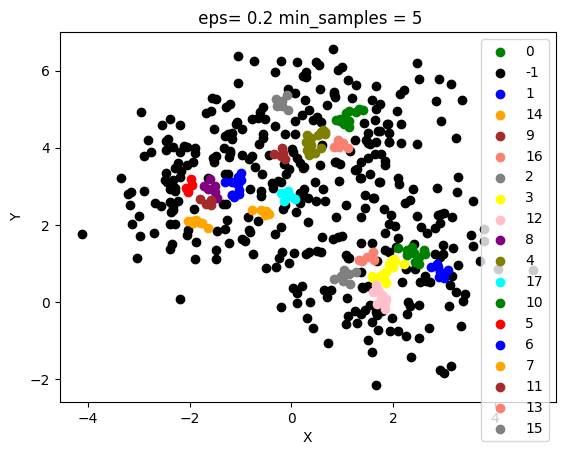

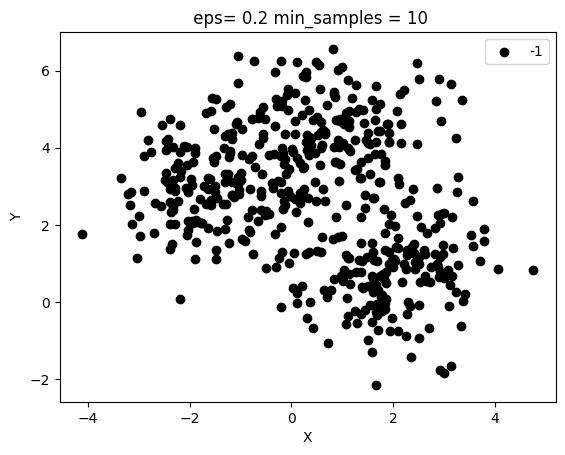

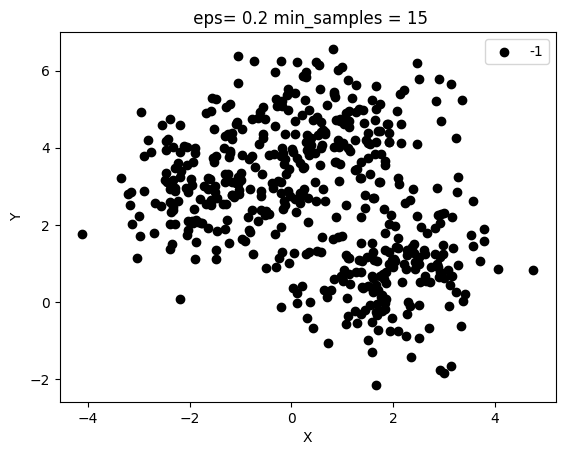

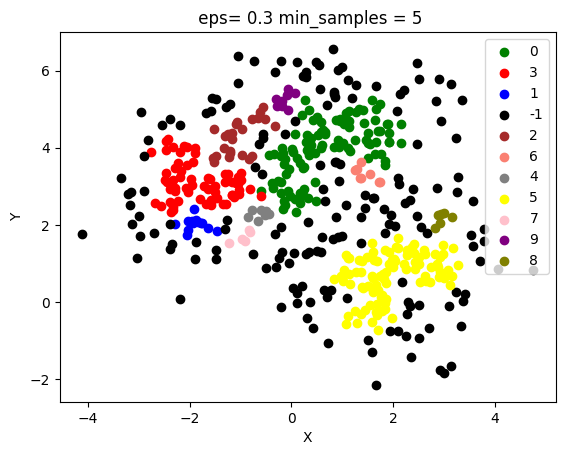

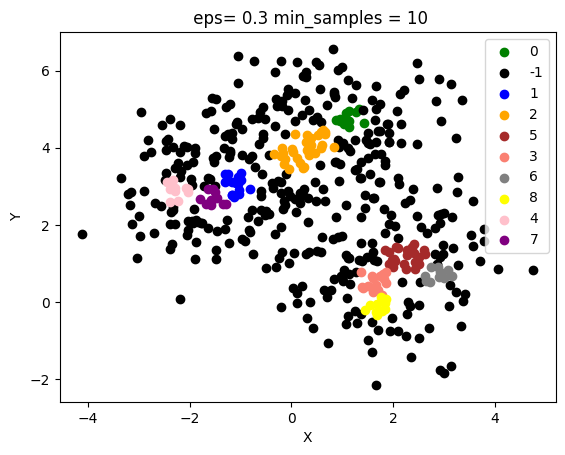

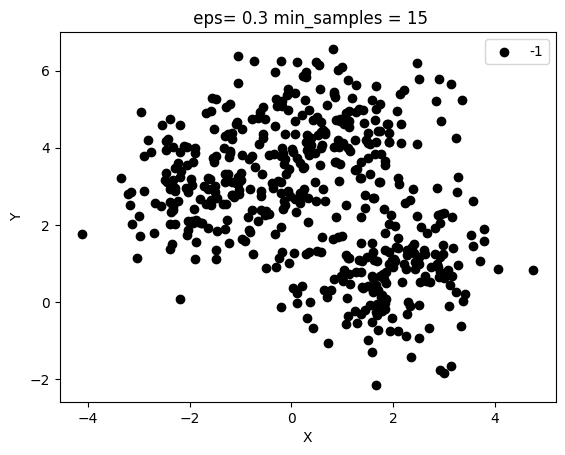

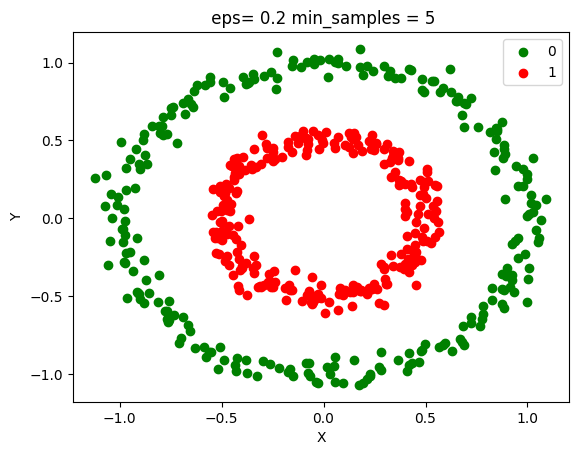

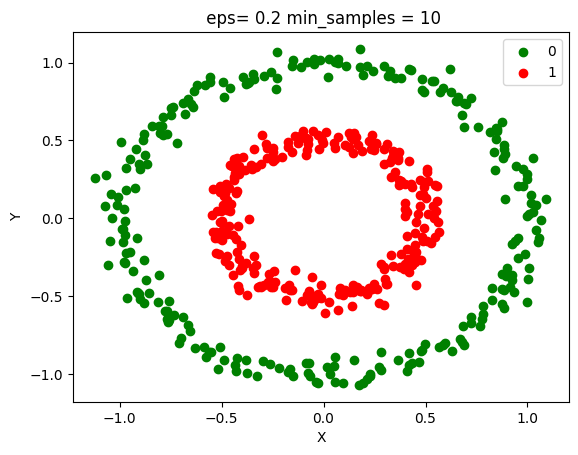

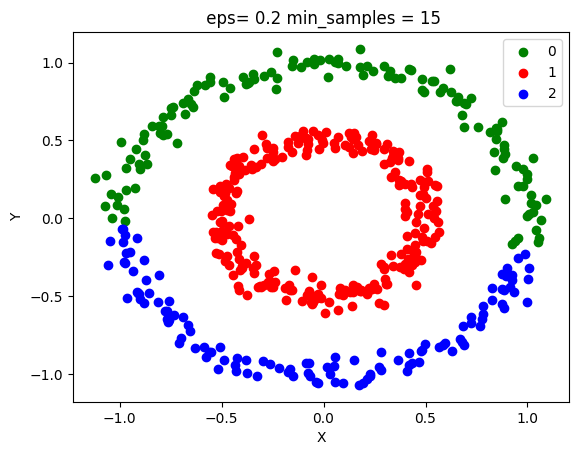

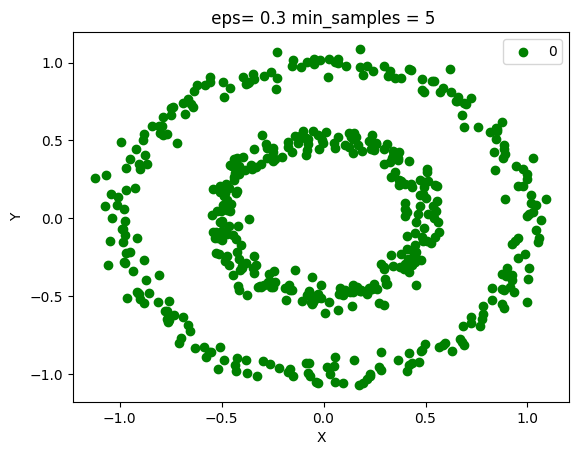

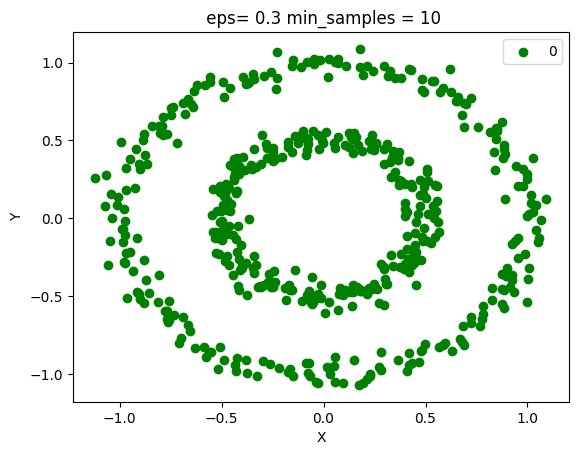

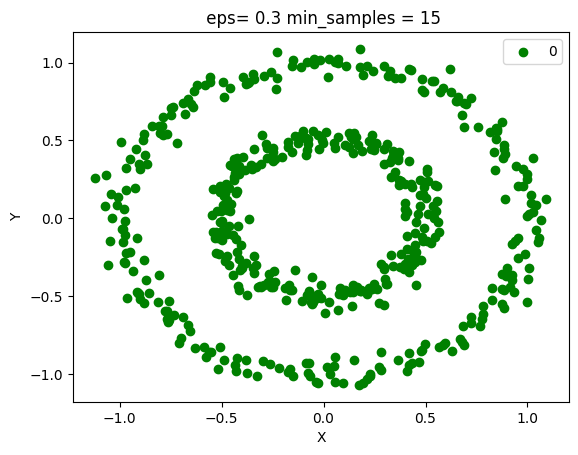

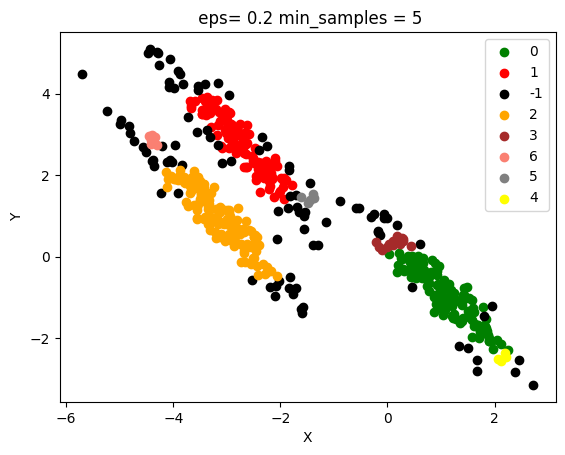

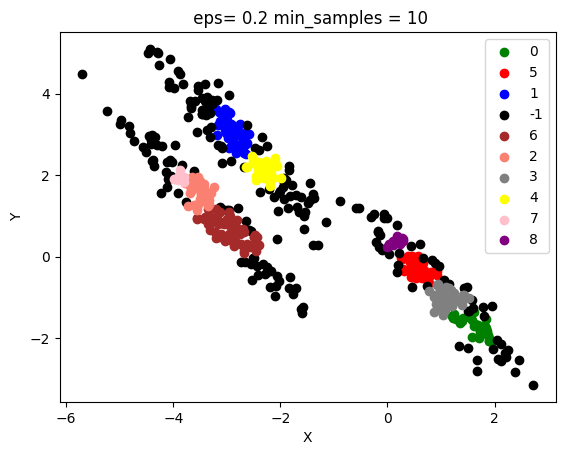

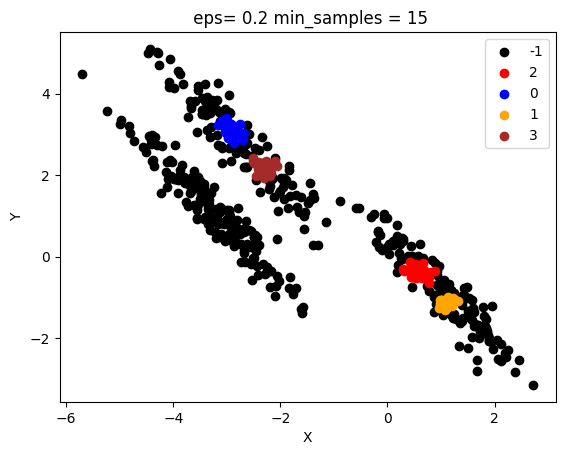

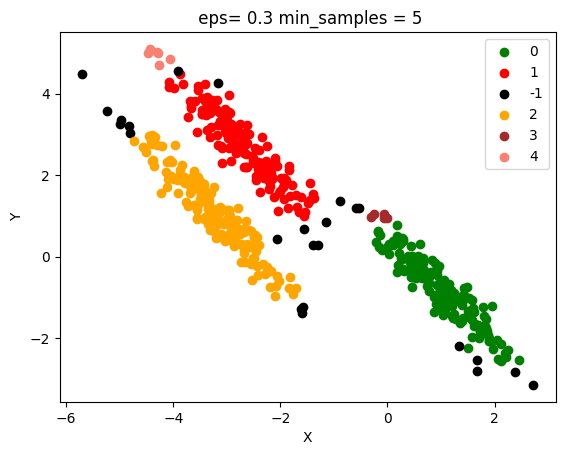

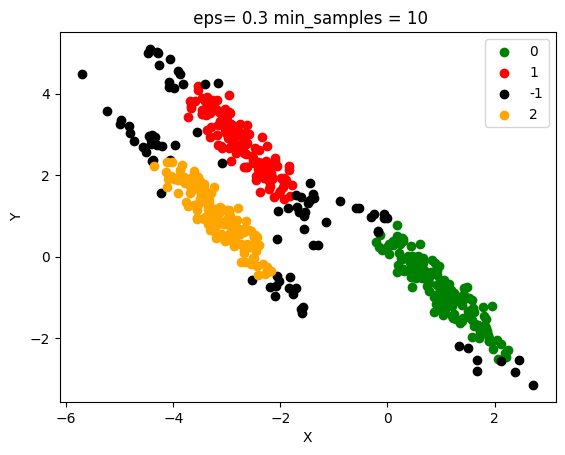

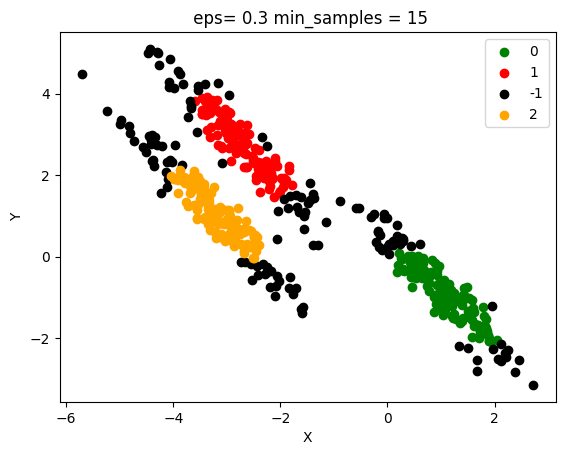

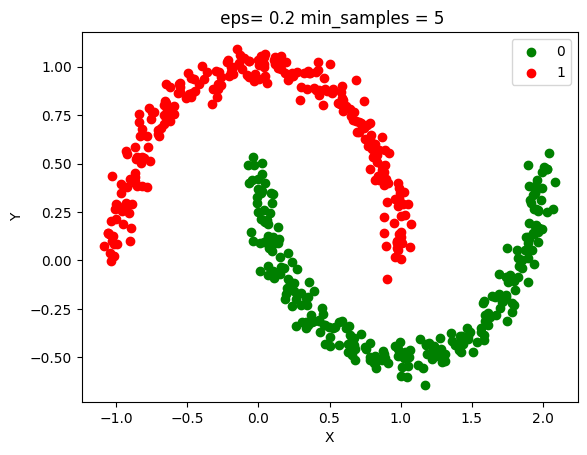

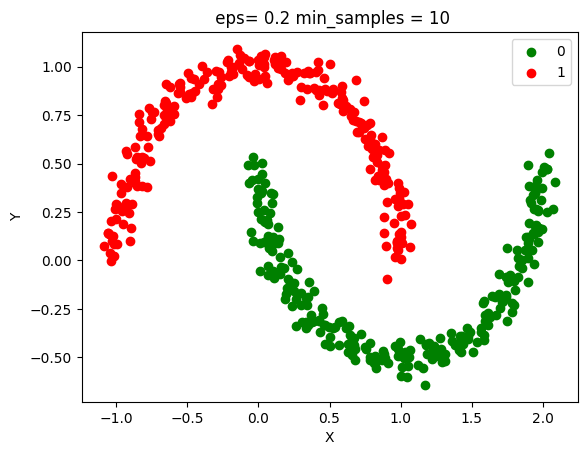

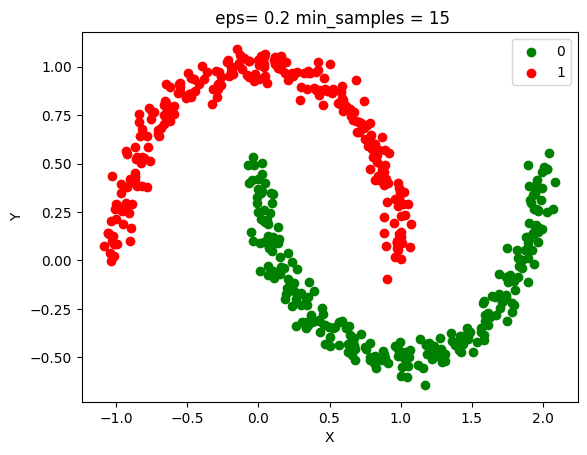

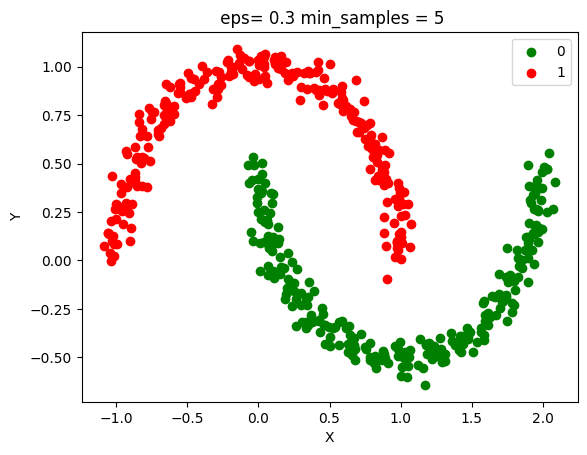

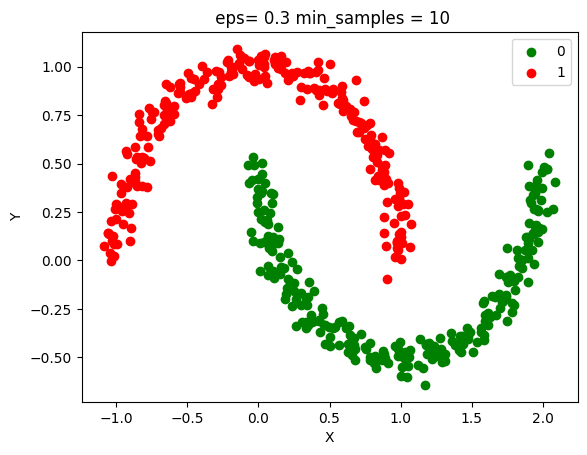

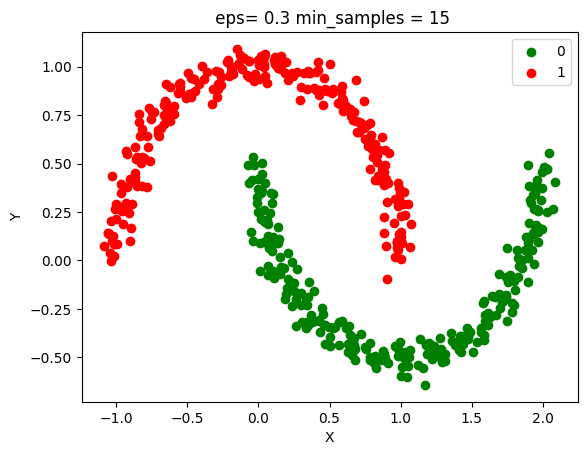

In [23]:
for data in dataset:
  for i in [0.2,0.3]:
    for j in [5,10,15]:
      title = f" eps= {i} min_samples = {j}"
      show_DBSCAN(data.copy(),i,j, title)

In [24]:
from sklearn.cluster import SpectralClustering
def show_SpectralClustering(df,n_clusters,gamma,title):
  df_y = df.pop(2)
  clustering = SpectralClustering(n_clusters=n_clusters,gamma=gamma).fit(df)
  df[2] = clustering.labels_
  show(df,title)

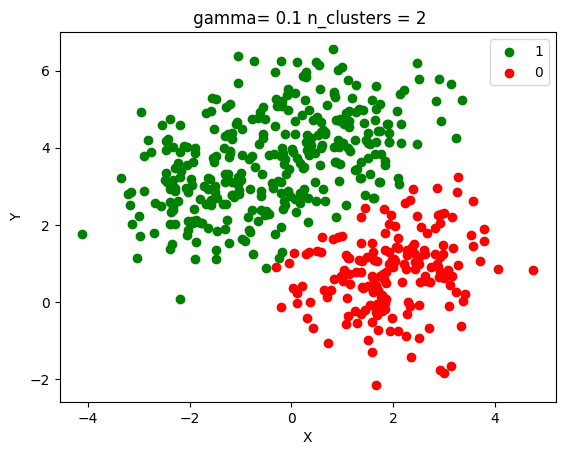

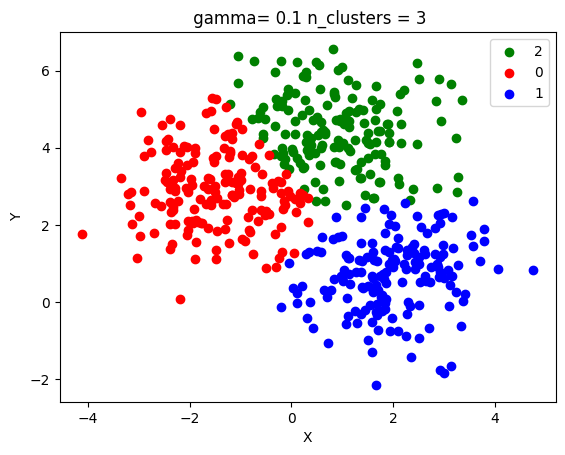

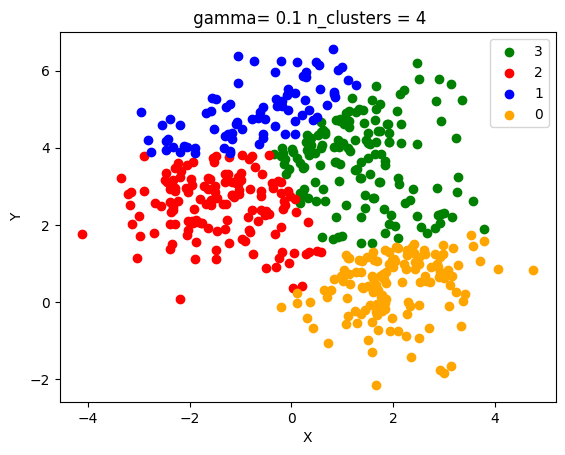

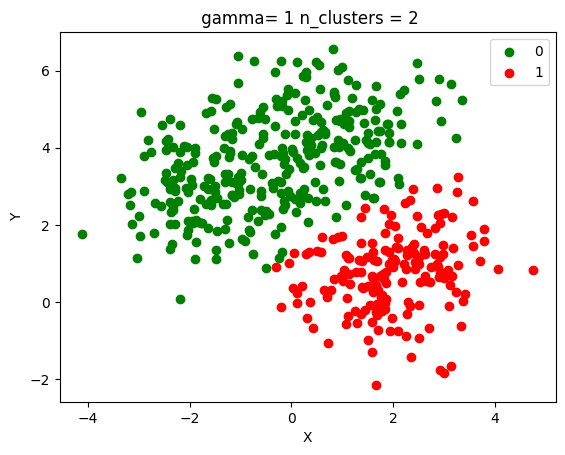

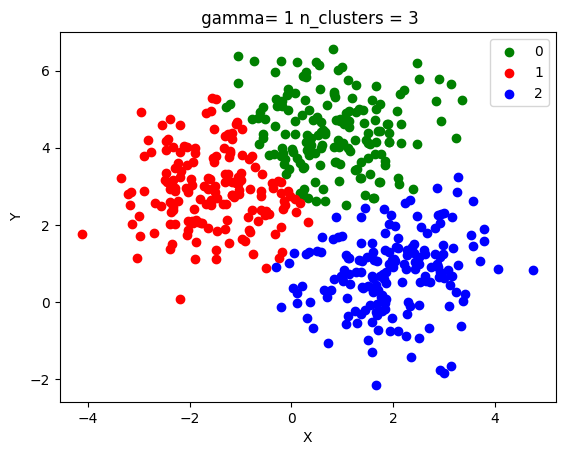

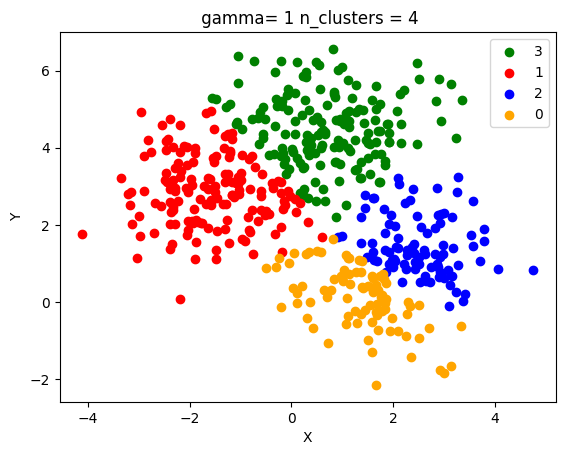

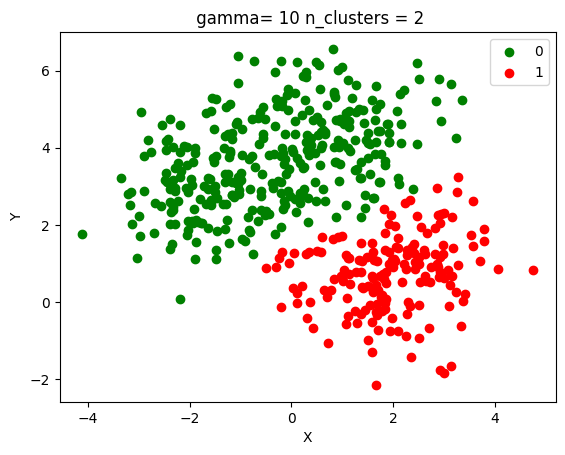

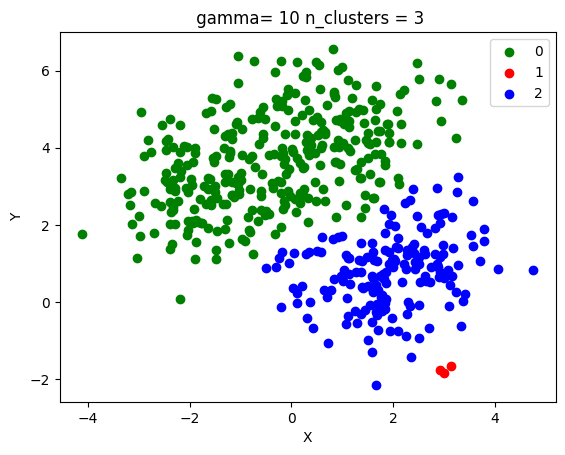

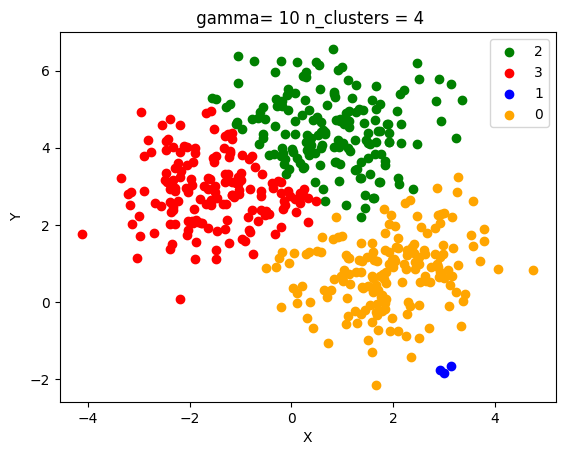

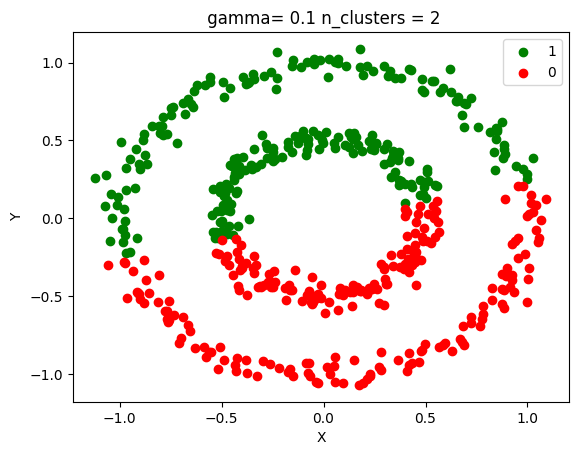

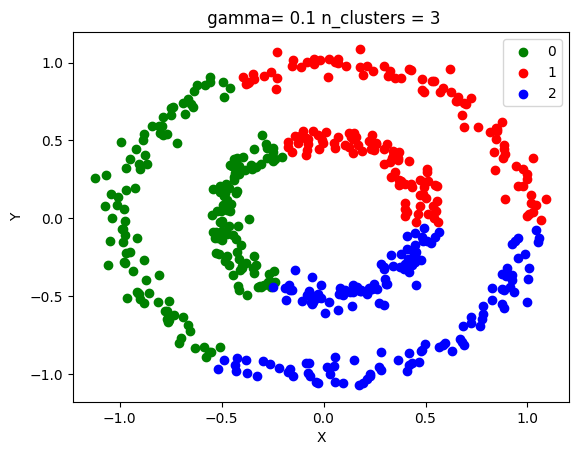

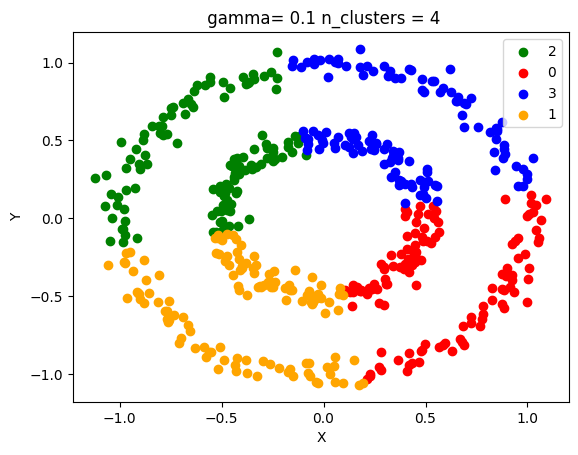

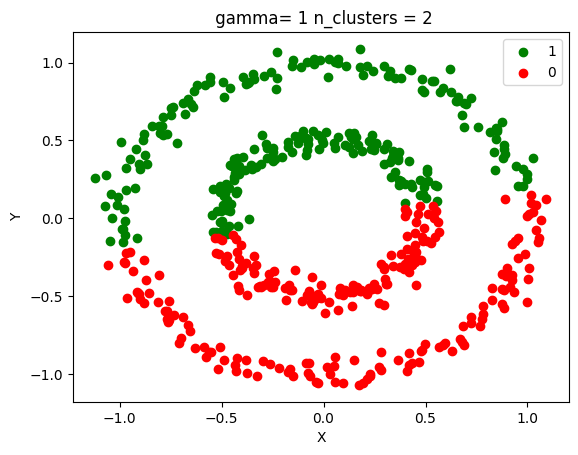

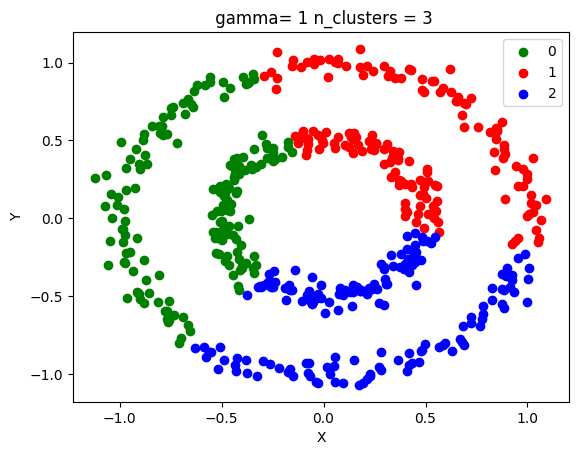

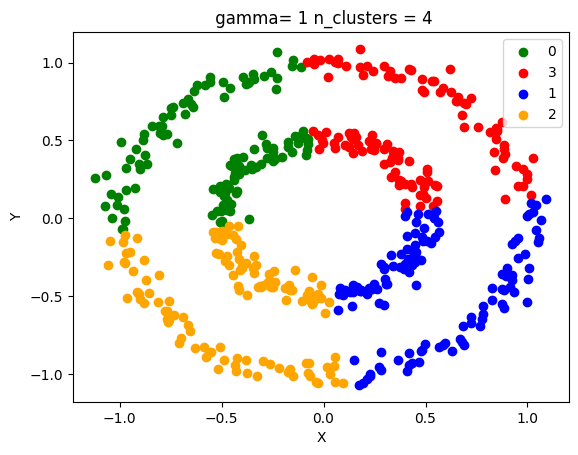

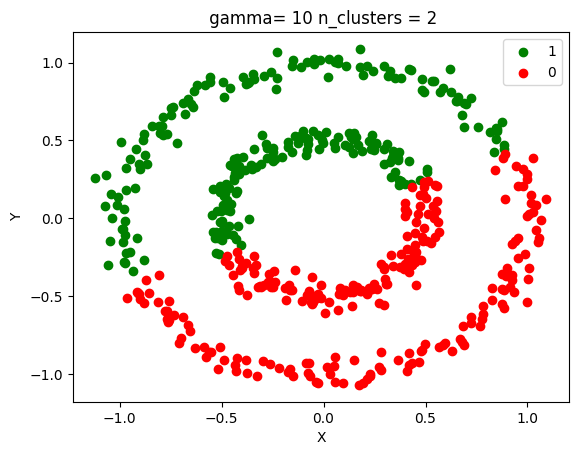

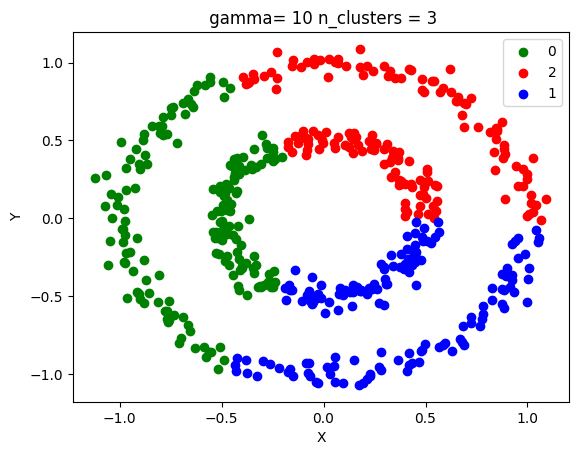

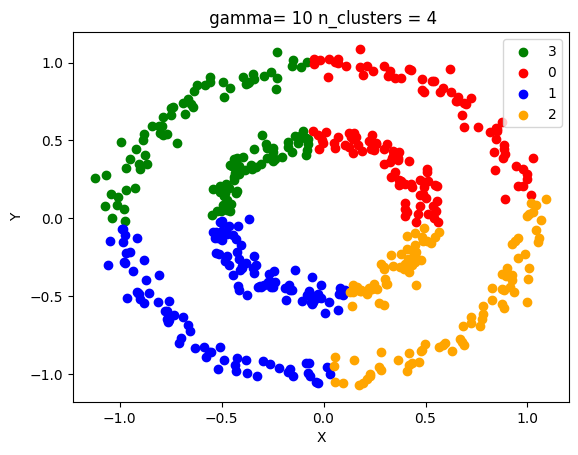

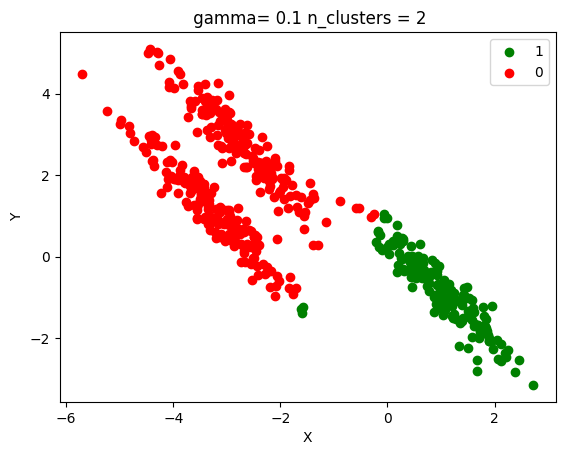

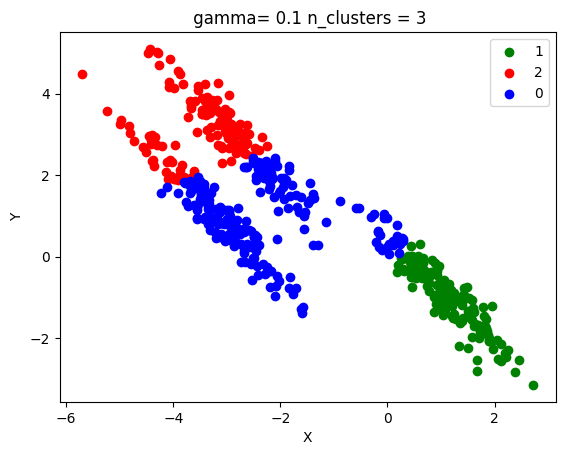

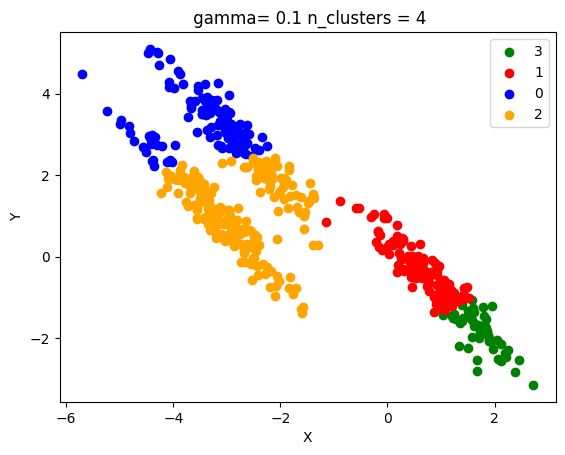

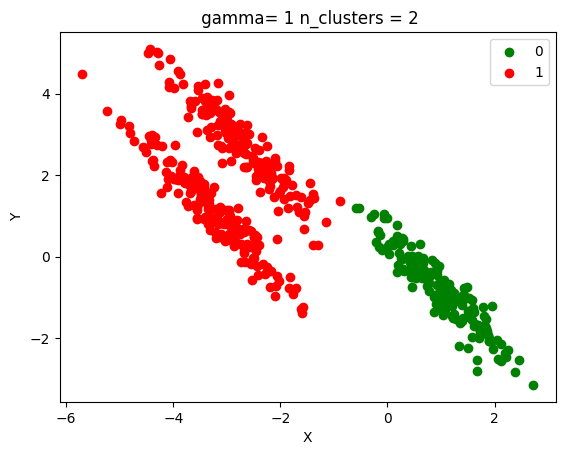

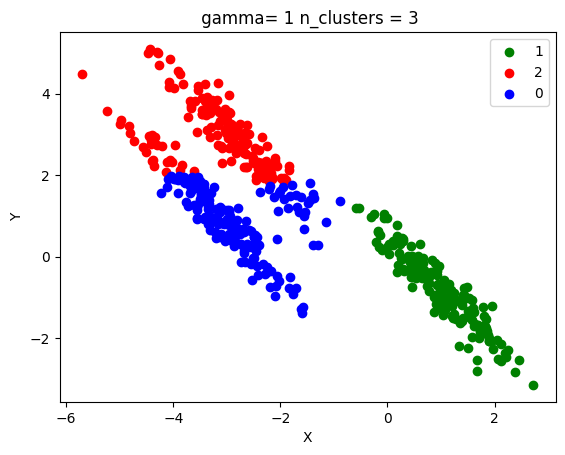

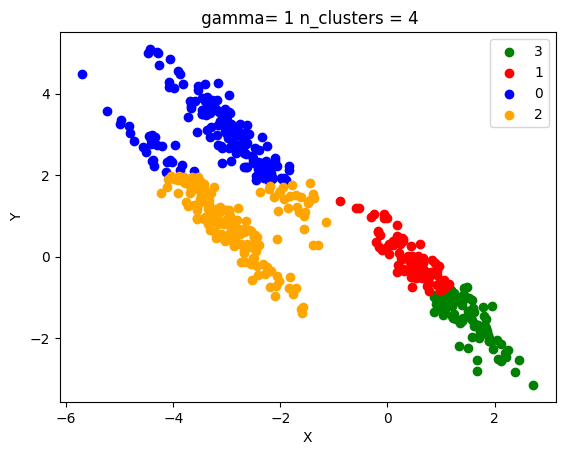

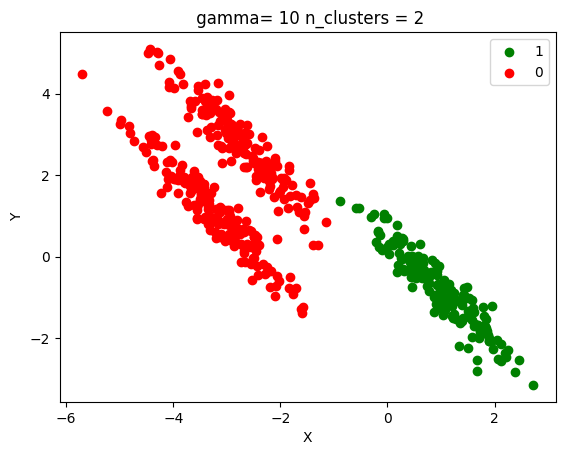

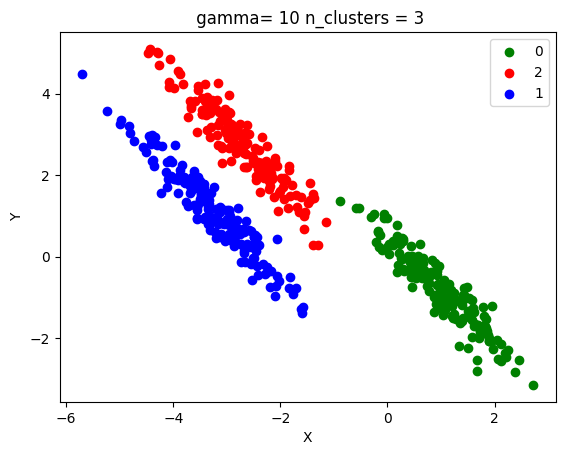

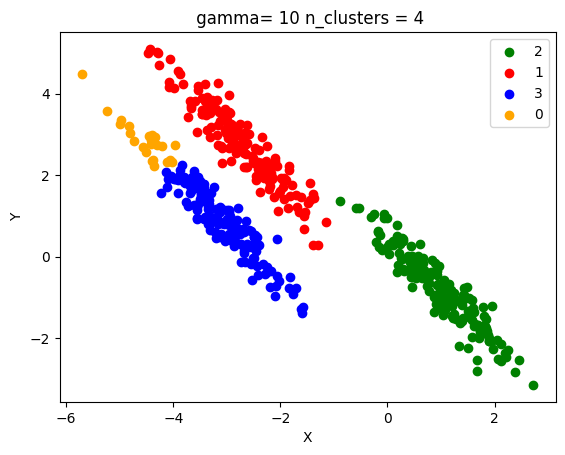

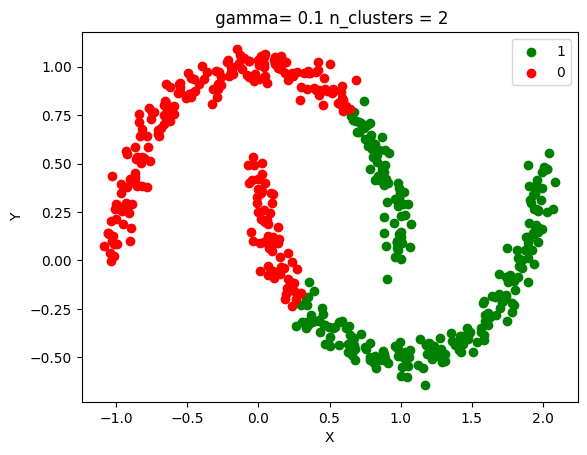

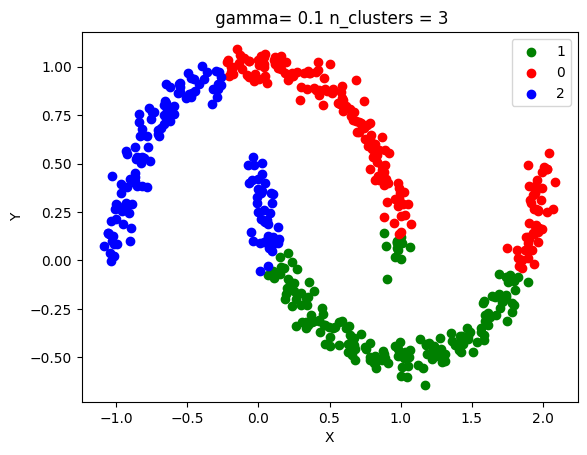

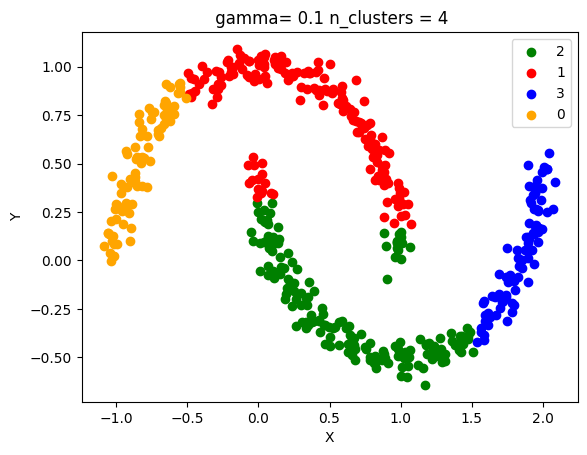

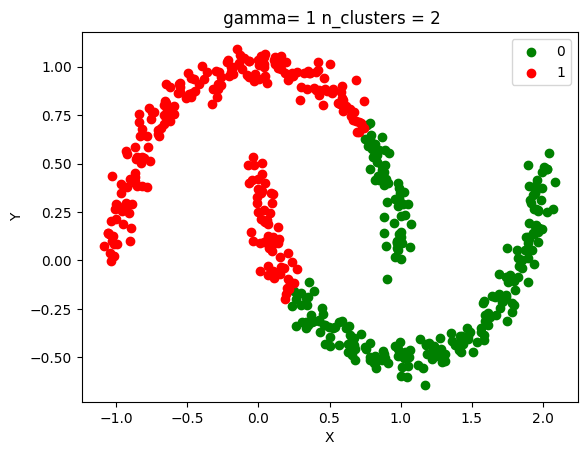

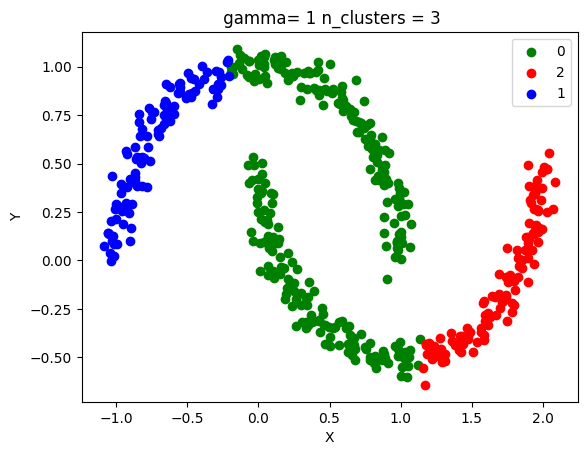

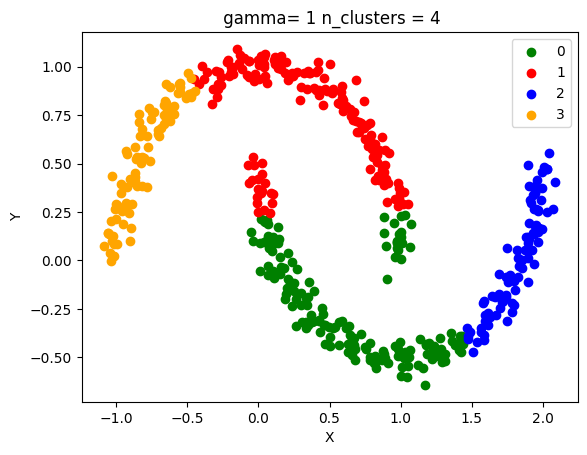

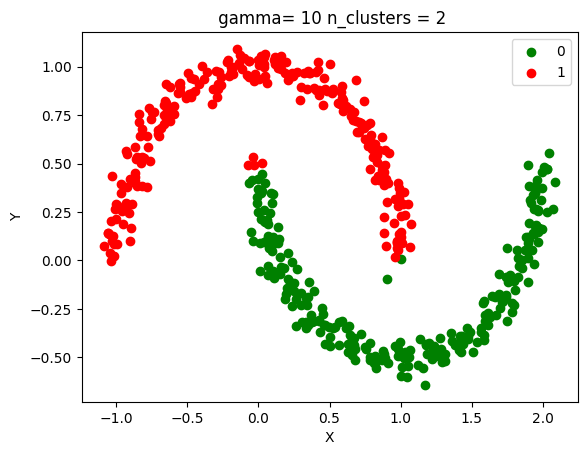

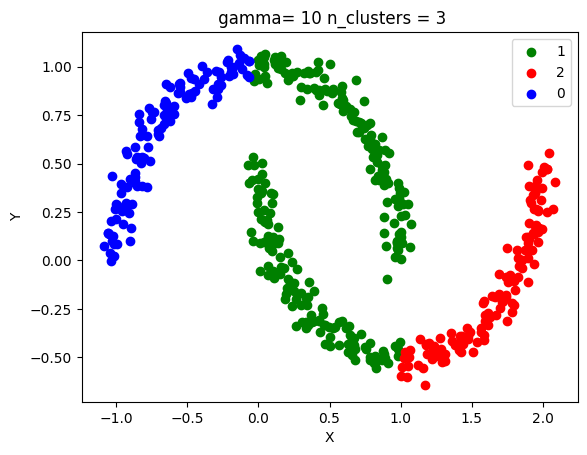

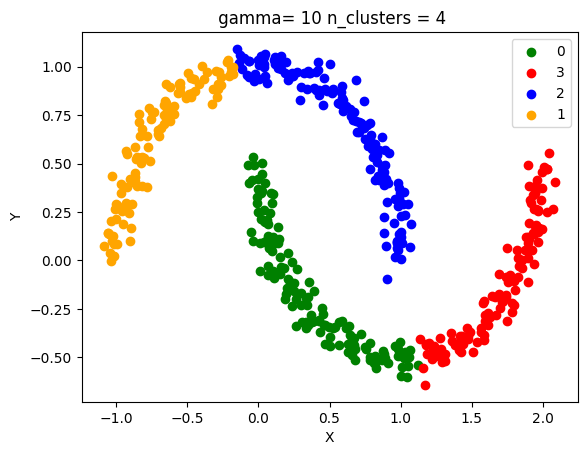

In [25]:
for data in dataset:
  for i in [0.1,1,10]:
    for j in [2,3,4]:
      title = f" gamma= {i} n_clusters = {j}"
      show_SpectralClustering(data.copy(),j,i, title)

• K-means

Najlepsze wyniki osiągnął dla zbiorów danych Circles i Moons. Wskazuje to na jego efektywność w pracy z eliptycznymi lub okrągłymi zbiorami, które są wzajemnie oddzielone.
Z wykresów wynika, że zwiększanie liczby klastrów prowadzi do równomiernego podziału danych i wyraźnych granic między nimi.

• DBSCAN

Ponownie najlepiej sprawdził się dla zbioru Circles, prawdopodobnie ze względu na zróżnicowaną gęstość tego zbioru.
Parametry w DBSCAN wpływają na tworzenie klastrów poprzez określanie, które punkty będą łączone na podstawie odległości i gęstości. Odpowiedni dobór tych parametrów pozwala uzyskać równomierne kształty klastrów bez zakłóceń.

• Klasteryzacja spektralna

Najlepsze wyniki osiągnęła przy danych Blobs, co sugeruje, że jest skuteczna w identyfikowaniu klastrów w zbiorach danych, które nie są liniowo separowalne.
Zwiększanie liczby klastrów prowadzi do podziału danych na więcej podzbiorów, a zmiana parametru gamma powoduje, że zbiory stają się mniej równomierne.

In [78]:
banknotes = pd.read_csv('./banknotes.csv',header=None)
from sklearn.preprocessing import normalize
y = banknotes.pop(0)
y = list(map(lambda x: (x+1)%2,y))

banknotes_normalized = normalize(banknotes,norm="l1")
print(banknotes_normalized)


[[0.33741753 0.20578071 0.20593779 0.01413761 0.0152372  0.22148916]
 [0.33885994 0.20480025 0.20480025 0.01279015 0.01500079 0.22374862]
 [0.3384276  0.20434851 0.20434851 0.01370726 0.01512526 0.22404285]
 ...
 [0.33709981 0.20448839 0.20464532 0.01663528 0.01741996 0.21971124]
 [0.33652038 0.20485893 0.20501567 0.01755486 0.01755486 0.2184953 ]
 [0.33726786 0.20443815 0.20443815 0.01605288 0.01809884 0.21970412]]


In [64]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
silhouette_score(banknotes, kmeans.fit_predict(banknotes))

0.5195647881381441

In [71]:
from sklearn.metrics import homogeneity_completeness_v_measure

print("KMeans")
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(banknotes_normalized)
print("accuracy",accuracy_score(y,kmeans.labels_))
values = homogeneity_completeness_v_measure(y,kmeans.labels_)
print("homogenity", values[0])
print("completeness", values[1])
print("v_measure", values[2])

KMeans
accuracy 0.98
homogenity 0.8776994414539947
completeness 0.8787138850047482
v_measure 0.8782063702756281


In [85]:
dbscan = DBSCAN(eps=0.2, min_samples=3).fit(banknotes)
print("DBSCAN")
print("accuracy",accuracy_score(y,dbscan.labels_))
values = homogeneity_completeness_v_measure(y,dbscan.labels_)
print("homogenity", values[0])
print("completeness", values[1])
print("v_measure", values[2])
if -1 in dbscan.labels_:
  print("Nie wszystkie banknoty zostały przypisane")
else:
  print("Wszystkie banknoty zostały przypisane")

DBSCAN
accuracy 0.0
homogenity 0.0
completeness 1.0
v_measure 0.0
Nie wszystkie banknoty zostały przypisane


• DBSCAN nie zdołał przypisać wszystkich banknotów do klastrów, co sugeruje, że niektóre z nich mogą być traktowane jako punkty odstające lub nieprzypisane do żadnego klastra.

• Homogeniczność: wartość 0,0 oznacza, że klastry są niehomogeniczne, co sugeruje, że punkty z różnych klas mogą trafić do tych samych klastrów.

• Zupełność: wartość 1,0 oznacza, że wszystkie punkty należące do jednej klasy zostały przypisane do jednego klastra, jednak jakość tych klastrów pozostaje niska.

• V-miara: wartość 0,0 w tym przypadku sugeruje, że klasteryzacja nie odpowiada rzeczywistemu podziałowi na banknoty oryginalne i fałszywe.

• K-means wykazuje wysoką skuteczność w przypisywaniu klastrów, co świadczy o tym, że struktura zbioru została dobrze odwzorowana przez algorytm.